In [1]:
import os
import pandas as pd
import json
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import dgl
import seaborn as sns
import math
from sklearn.metrics import r2_score
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None) 

from utils.plot_helpers import *

/Users/nikolaimerkel/development/gnn-paper-plots/virtualenv-example/env/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
experiments = pd.read_csv("logs/sec-4.1_4.2_4.5_4.6_4.7_4.8.csv")
reordering_metrics = pd.read_csv("logs/reorderings-metrics-detailed.csv")
reordering_metrics = rename(reordering_metrics)

In [3]:

def overview_box_plot(group2classes2values, y_lim=None, yline=None, xlabel=None, ylabel=None, bbox_to_anchor=(0.5, 1.30), save_as= None, log=True):
    groups = list(group2classes2values.keys())
    classes = list(group2classes2values[groups[0]])
    classes = order(classes)
    print("groups",groups)
    print("classes",classes)
    colors = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78',
        '#98df8a', '#ff9896','#ff9896','#ff9896'
    ]
    class2color = {}
    for class_index in range(len(classes)):
        class2color[classes[class_index]] = colors[class_index % len(colors)]
    pos = 0
    for group_index in range(len(groups)):
        group = groups[group_index]
        for class_index in range(len(classes)):
            clas = classes[class_index]
            #bp = plt.boxplot(group2classes2values[group][clas], positions=[pos], sym='', widths=0.6, showmeans=False, meanline=True)
            bp = plt.violinplot(group2classes2values[group][clas], positions=[pos], widths=0.6,showmedians=True)
            for body in bp['bodies']:
                body.set_facecolor(class2color[clas])  # Set the violin body color to blue
                body.set_edgecolor(class2color[clas])  # Set the edge color of the violin
                body.set_alpha(0.7)  # Set transparency level
                if 'cmedians' in bp:
                    bp['cmedians'].set_color(class2color[clas])  # Set the median line to red
                    bp['cmedians'].set_linewidth(2)  # Set the linewidth of the median
                    bp['cmaxes'].set_color(class2color[clas])  # Set the median line to red
                    bp['cmaxes'].set_linewidth(2)  # Set the linewidth of the median
                    bp['cmins'].set_color(class2color[clas])  # Set the median line to red
                    bp['cmins'].set_linewidth(2)  # Set the linewidth of the median
                    bp['cbars'].set_color(class2color[clas])  # Set the median line to red
                    bp['cbars'].set_linewidth(2)  # Set the linewidth of the median
        #    plt.setp(bp['boxes'], c=class2color[clas])
         #   plt.setp(bp['whiskers'], c=class2color[clas])
          #  plt.setp(bp['caps'], c=class2color[clas])
           # plt.setp(bp['medians'], c=class2color[clas])
            pos += 1
        if(group_index < len(groups)-1 ):
            plt.axvline(x = pos, color = 'gray', linestyle="--", lw=1 )
        pos += 1
    for clas in classes:
        plt.plot([], c=class2color[clas], label=clas)
    first_x_tick =  0
    if len(classes) > 1:
        first_x_tick = len(classes) / 2 - 0.5
    x_ticks = [first_x_tick]
    for i in range(1, len(groups)):
        x_ticks.append(x_ticks[-1]+len(classes)+1)
    plt.xticks(x_ticks, groups, rotation=0)       
    if not yline is None:
        plt.axhline(y = yline, color = 'red', linestyle="--", lw=1, label="Random")
    if not ylabel is None:
        plt.ylabel(ylabel)
    if not xlabel is None:
        plt.xlabel(xlabel)
    plt.legend(loc='upper center', bbox_to_anchor=bbox_to_anchor, shadow=False, ncol=8)
    if not y_lim is None:
        plt.ylim(0,y_lim )
    plt.grid()
    if log:
        plt.yscale("log")
    if not save_as is None:
        plt.savefig(f"{save_as}.pdf", bbox_inches='tight')

    plt.show()

In [4]:

def overview_box_plot_amortization(group2classes2values, y_lim=None, yline=None, xlabel=None, ylabel=None, bbox_to_anchor=(0.5, 1.30), save_as= None, log=True, legend=True):
    groups = list(group2classes2values.keys())
    classes = list(group2classes2values[groups[0]])
    classes = order(classes)
    print(f"Classes: {classes}")
    colors = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78',
        '#98df8a', '#ff9896','#ff9896','#ff9896'
    ]
    class2color = {}
    for class_index in range(len(classes)):
        class2color[classes[class_index]] = colors[class_index % len(colors)]
    pos = 0
    for group_index in range(len(groups)):
        group = groups[group_index]
        for class_index in range(len(classes)):
            clas = classes[class_index]
            bp = plt.boxplot(group2classes2values[group][clas], positions=[pos], sym='', widths=0.6, showmeans=False, meanline=True)
           # bp = plt.violinplot(group2classes2values[group][clas], positions=[pos], widths=0.6,showmedians=True)
            #for body in bp['bodies']:
             #   body.set_facecolor(class2color[clas])  # Set the violin body color to blue
              #  body.set_edgecolor(class2color[clas])  # Set the edge color of the violin
               # body.set_alpha(0.7)  # Set transparency level
                #if 'cmedians' in bp:
                 #   bp['cmedians'].set_color(class2color[clas])  # Set the median line to red
                  #  bp['cmedians'].set_linewidth(2)  # Set the linewidth of the median
                   # bp['cmaxes'].set_color(class2color[clas])  # Set the median line to red
                    #bp['cmaxes'].set_linewidth(2)  # Set the linewidth of the median
                   # bp['cmins'].set_color(class2color[clas])  # Set the median line to red
                   # bp['cmins'].set_linewidth(2)  # Set the linewidth of the median
                   # bp['cbars'].set_color(class2color[clas])  # Set the median line to red
                   # bp['cbars'].set_linewidth(2)  # Set the linewidth of the median
            plt.setp(bp['boxes'], c=class2color[clas])
            plt.setp(bp['whiskers'], c=class2color[clas])
            plt.setp(bp['caps'], c=class2color[clas])
            plt.setp(bp['medians'], c=class2color[clas])
            pos += 1
        if(group_index < len(groups)-1 ):
            plt.axvline(x = pos, color = 'gray', linestyle="--", lw=1 )
        pos += 1
    for clas in classes:
        plt.plot([], c=class2color[clas], label=clas)
    first_x_tick =  0
    if len(classes) > 1:
        first_x_tick = len(classes) / 2 - 0.5
    x_ticks = [first_x_tick]
    for i in range(1, len(groups)):
        x_ticks.append(x_ticks[-1]+len(classes)+1)
    plt.xticks(x_ticks, groups, rotation=0)       
    if not yline is None:
        plt.axhline(y = yline, color = 'red', linestyle="--", lw=1, label="")
    if not ylabel is None:
        plt.ylabel(ylabel)
    if not xlabel is None:
        plt.xlabel(xlabel)
#    plt.legend(loc='upper left', shadow=False, ncol=8)
    if legend:
        plt.legend(loc='upper center', bbox_to_anchor=bbox_to_anchor, shadow=False, ncol=8)
    if not y_lim is None:
        plt.ylim(0,y_lim )
    plt.grid()
    if log:
        plt.yscale("log")
    if not save_as is None:
        plt.savefig(f"{save_as}.pdf", bbox_inches='tight')

    plt.show()

In [5]:

def overview_box_plot(group2classes2values, y_lim=None, yline=None, xlabel=None, ylabel=None, bbox_to_anchor=(0.5, 1.30), save_as= None, log=True):
    groups = list(group2classes2values.keys())
    classes = list(group2classes2values[groups[0]])
    classes = order(classes)
    print(f"Classes: {classes}")
    colors = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78',
        '#98df8a', '#ff9896','#ff9896','#ff9896'
    ]
    class2color = {}
    for class_index in range(len(classes)):
        class2color[classes[class_index]] = colors[class_index % len(colors)]
    pos = 0
    for group_index in range(len(groups)):
        group = groups[group_index]
        for class_index in range(len(classes)):
            clas = classes[class_index]
            bp = plt.boxplot(group2classes2values[group][clas], positions=[pos], sym='', widths=0.6, showmeans=False, meanline=True)
           # bp = plt.violinplot(group2classes2values[group][clas], positions=[pos], widths=0.6,showmedians=True)
            #for body in bp['bodies']:
             #   body.set_facecolor(class2color[clas])  # Set the violin body color to blue
              #  body.set_edgecolor(class2color[clas])  # Set the edge color of the violin
               # body.set_alpha(0.7)  # Set transparency level
                #if 'cmedians' in bp:
                 #   bp['cmedians'].set_color(class2color[clas])  # Set the median line to red
                  #  bp['cmedians'].set_linewidth(2)  # Set the linewidth of the median
                   # bp['cmaxes'].set_color(class2color[clas])  # Set the median line to red
                    #bp['cmaxes'].set_linewidth(2)  # Set the linewidth of the median
                   # bp['cmins'].set_color(class2color[clas])  # Set the median line to red
                   # bp['cmins'].set_linewidth(2)  # Set the linewidth of the median
                   # bp['cbars'].set_color(class2color[clas])  # Set the median line to red
                   # bp['cbars'].set_linewidth(2)  # Set the linewidth of the median
            plt.setp(bp['boxes'], c=class2color[clas])
            plt.setp(bp['whiskers'], c=class2color[clas])
            plt.setp(bp['caps'], c=class2color[clas])
            plt.setp(bp['medians'], c=class2color[clas])
            pos += 1
        if(group_index < len(groups)-1 ):
            plt.axvline(x = pos, color = 'gray', linestyle="--", lw=1 )
        pos += 1
    for clas in classes:
        plt.plot([], c=class2color[clas], label=clas)
    first_x_tick =  0
    if len(classes) > 1:
        first_x_tick = len(classes) / 2 - 0.5
    x_ticks = [first_x_tick]
    for i in range(1, len(groups)):
        x_ticks.append(x_ticks[-1]+len(classes)+1)
    plt.xticks(x_ticks, groups, rotation=0)       
    if not yline is None:
        plt.axhline(y = yline, color = 'red', linestyle="--", lw=1, label="")
    if not ylabel is None:
        plt.ylabel(ylabel)
    if not xlabel is None:
        plt.xlabel(xlabel)
    plt.legend(loc='upper left', shadow=False, ncol=8)
  #  plt.legend(loc='upper left', bbox_to_anchor=bbox_to_anchor, shadow=False, ncol=8)
    if not y_lim is None:
        plt.ylim(0,y_lim )
    plt.grid()
    if log:
        plt.yscale("log")
    if not save_as is None:
        plt.savefig(f"{save_as}.pdf", bbox_inches='tight')

    plt.show()

['16', '64', '128']
Classes: ['16', '64', '128']


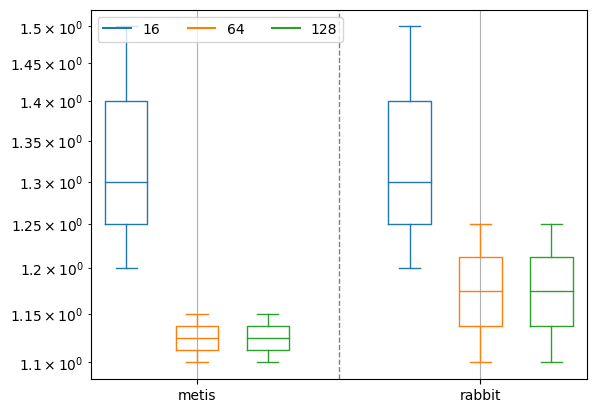

In [6]:
example = {
    "metis": {
        "16": [1.2, 1.3, 1.5],
        "64": [1.1, 1.15],
        "128": [1.1, 1.15],
    },
    "rabbit": {
        "16": [1.2, 1.3, 1.5],
        "64": [1.1, 1.25],
        "128": [1.1, 1.25]
    }
}

overview_box_plot(example)

Section 4.2

Figure 4a

('dgl', 'CPU')
Reordering: bfs Hidden: 16 Values: 0.9423278793755095
Reordering: bfs Hidden: 32 Values: 0.9009104958427853
Reordering: bfs Hidden: 64 Values: 0.8860592853058876
Reordering: bfs Hidden: 256 Values: 0.8897972784479566
Reordering: degsort Hidden: 16 Values: 0.5592720720525955
Reordering: degsort Hidden: 32 Values: 0.5411004965804318
Reordering: degsort Hidden: 64 Values: 0.5370362220456391
Reordering: degsort Hidden: 256 Values: 0.6267812476319362
Reordering: dfs Hidden: 16 Values: 0.9306515826035097
Reordering: dfs Hidden: 32 Values: 0.8880116002279339
Reordering: dfs Hidden: 64 Values: 0.888846716752899
Reordering: dfs Hidden: 256 Values: 0.9064522722293672
Reordering: gorder Hidden: 16 Values: 0.9177067582055045
Reordering: gorder Hidden: 32 Values: 0.9021422269472991
Reordering: gorder Hidden: 64 Values: 0.8939044370405484
Reordering: gorder Hidden: 256 Values: 0.8934694066618482
Reordering: hubcluster Hidden: 16 Values: 0.7610479918045401
Reordering: hubcluster Hidden

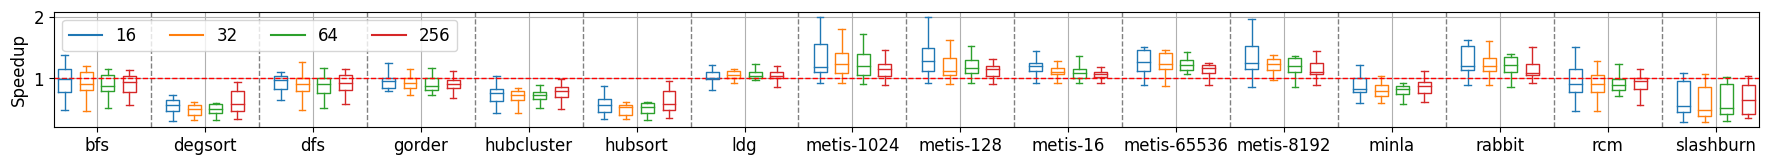

In [7]:
rows = []

plt.rcParams["figure.figsize"] = (22,1.5)
plt.rcParams.update({'font.size': 12})

exp = experiments.copy()
hidden_dims = [16,32,64,256] 
exp = exp[(((exp.num_features == 256) & (exp.num_layers == 2) & (exp.system == "dgl") & (exp.infrastructure == "CPU")) & exp.hidden_dim.isin(hidden_dims))]
for i, d in exp.groupby(by=["system","infrastructure"]):
    g = d[["graph_name", "reordering_strategy", "num_features"]].groupby(by=["graph_name", "reordering_strategy"],as_index=False).count()
    g = g[g["num_features"]==2*len(hidden_dims)]
    d = d[d.graph_name.isin(list(g.graph_name.unique()))]  
    print(i)
    data_dict = {}
    reordering_strategies = list(d.reordering_strategy.unique())
    reordering_strategies.sort()
    for reordering in reordering_strategies:
        data_dict[reordering] = {}
        for hidden_dim in hidden_dims:
            values = d[(d.hidden_dim.isin([hidden_dim])) & (d.reordering_strategy.isin([reordering]))]["speedup"].to_numpy() 
            data_dict[reordering][hidden_dim] = values
            print(f"Reordering: {reordering} Hidden: {hidden_dim} Values: {np.mean(values)}")
    save_as = f"figures/gnn_parameters/hidden/{'_'.join(i)}-boxplot"
   # print(data_dict)
    overview_box_plot(data_dict,xlabel="", ylabel="Speedup",yline=1, bbox_to_anchor=(0.5, 1.5), save_as=save_as, log=False)
    

Figures 4b and 4c

('dgl', 'GPU', 'GAT')
Reordering: bfs Hidden: 16 Values: 1.2268258503591472
Reordering: bfs Hidden: 32 Values: 1.220377928166856
Reordering: bfs Hidden: 64 Values: 1.2106875852006345
Reordering: bfs Hidden: 256 Values: 1.1981886523563643
Reordering: degsort Hidden: 16 Values: 1.0632180124747679
Reordering: degsort Hidden: 32 Values: 1.0682969459376088
Reordering: degsort Hidden: 64 Values: 1.0640523148722363
Reordering: degsort Hidden: 256 Values: 1.0563923402251445
Reordering: dfs Hidden: 16 Values: 1.2511969532910154
Reordering: dfs Hidden: 32 Values: 1.2398717172363367
Reordering: dfs Hidden: 64 Values: 1.2295724258463598
Reordering: dfs Hidden: 256 Values: 1.2100470042159883
Reordering: gorder Hidden: 16 Values: 1.2744860039012267
Reordering: gorder Hidden: 32 Values: 1.2692744932044524
Reordering: gorder Hidden: 64 Values: 1.2636715002224457
Reordering: gorder Hidden: 256 Values: 1.2512812396300454
Reordering: hubcluster Hidden: 16 Values: 1.1591070409188702
Reordering: hubcluster

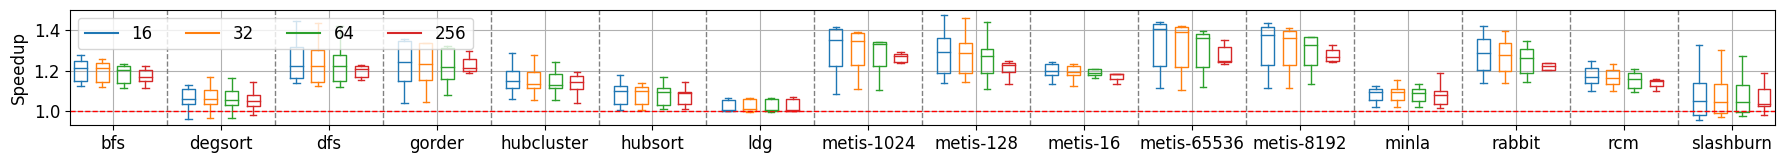

('dgl', 'GPU', 'GCN')
Reordering: bfs Hidden: 16 Values: 1.1443702167613288
Reordering: bfs Hidden: 32 Values: 1.1520183949342948
Reordering: bfs Hidden: 64 Values: 1.2552625061321458
Reordering: bfs Hidden: 256 Values: 1.3355489975379502
Reordering: degsort Hidden: 16 Values: 1.0324989370401696
Reordering: degsort Hidden: 32 Values: 1.0545282270045369
Reordering: degsort Hidden: 64 Values: 1.0716158523519623
Reordering: degsort Hidden: 256 Values: 1.0592841083306415
Reordering: dfs Hidden: 16 Values: 1.1285434090503565
Reordering: dfs Hidden: 32 Values: 1.1405288448629516
Reordering: dfs Hidden: 64 Values: 1.2115645717780337
Reordering: dfs Hidden: 256 Values: 1.2855601450398098
Reordering: gorder Hidden: 16 Values: 1.198781989311034
Reordering: gorder Hidden: 32 Values: 1.1935590309576314
Reordering: gorder Hidden: 64 Values: 1.316605161009953
Reordering: gorder Hidden: 256 Values: 1.5450205256863416
Reordering: hubcluster Hidden: 16 Values: 1.081236429474446
Reordering: hubcluster H

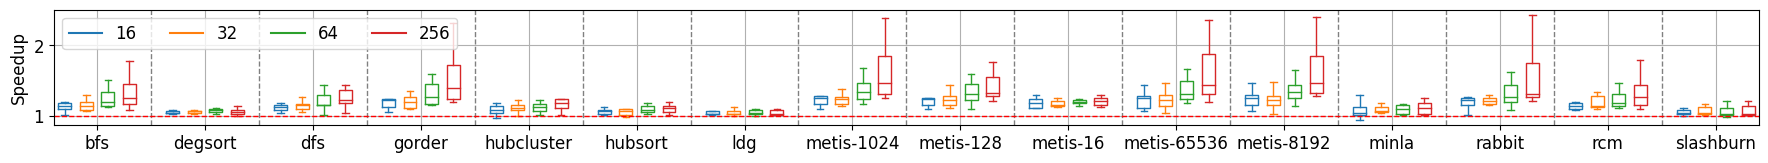

In [8]:
rows = []

plt.rcParams["figure.figsize"] = (22,1.5)
plt.rcParams.update({'font.size': 12})


exp = experiments.copy()
hidden_dims = [16,32,64,256] 
exp = exp[(((exp.num_features == 256) & (exp.num_layers == 2) & (exp.system == "dgl") & (exp.infrastructure == "GPU")) & exp.hidden_dim.isin(hidden_dims))]
for i, d in exp.groupby(by=["system","infrastructure", "model"]):
    print(i)
    g = d[["graph_name", "reordering_strategy", "num_features"]].groupby(by=["graph_name", "reordering_strategy"],as_index=False).count()
    g = g[g["num_features"]==len(hidden_dims)]    
   # print(d[["graph_name","reordering_strategy", "num_features"]].groupby(by=["graph_name", "reordering_strategy"], as_index=False).count()["num_features"].min())
    d = d[d.graph_name.isin(list(g.graph_name.unique()))]  
    data_dict = {}
    reordering_strategies = list(d.reordering_strategy.unique())
    reordering_strategies.sort()
    for reordering in reordering_strategies:
        data_dict[reordering] = {}
        for hidden_dim in hidden_dims:
            values = d[(d.hidden_dim.isin([hidden_dim])) & (d.reordering_strategy.isin([reordering]))]["speedup"].to_numpy() 
            data_dict[reordering][hidden_dim] = values
            print(f"Reordering: {reordering} Hidden: {hidden_dim} Values: {np.mean(values)}")
     #       print(hidden_dim, len(values), d[(d.hidden_dim.isin([hidden_dim])) & (d.reordering_strategy.isin([reordering]))].graph_name.unique())
    save_as = f"figures/gnn_parameters/hidden/{'_'.join(i)}-boxplot"
    overview_box_plot(data_dict,xlabel="", ylabel="Speedup",yline=1, bbox_to_anchor=(0.5, 1.5), save_as=save_as, log=False)
    

features

Figure 5a

6
('dgl', 'CPU')
Reordering: bfs Features: 16 Values: 0.989999143963142
Reordering: bfs Features: 64 Values: 1.0010188513914713
Reordering: bfs Features: 512 Values: 0.9700445816793836
Reordering: degsort Features: 16 Values: 0.6492358502706775
Reordering: degsort Features: 64 Values: 0.6342087790844675
Reordering: degsort Features: 512 Values: 0.6606646049697837
Reordering: dfs Features: 16 Values: 0.9486284108521394
Reordering: dfs Features: 64 Values: 0.9583416058783902
Reordering: dfs Features: 512 Values: 0.9496883578998043
Reordering: gorder Features: 16 Values: 0.9292179771572043
Reordering: gorder Features: 64 Values: 0.9288624628488944
Reordering: gorder Features: 512 Values: 0.9315956139140934
Reordering: hubcluster Features: 16 Values: 0.8113918233954386
Reordering: hubcluster Features: 64 Values: 0.8055369509562732
Reordering: hubcluster Features: 512 Values: 0.812433822022739
Reordering: hubsort Features: 16 Values: 0.6381012171860352
Reordering: hubsort Features: 64 Value

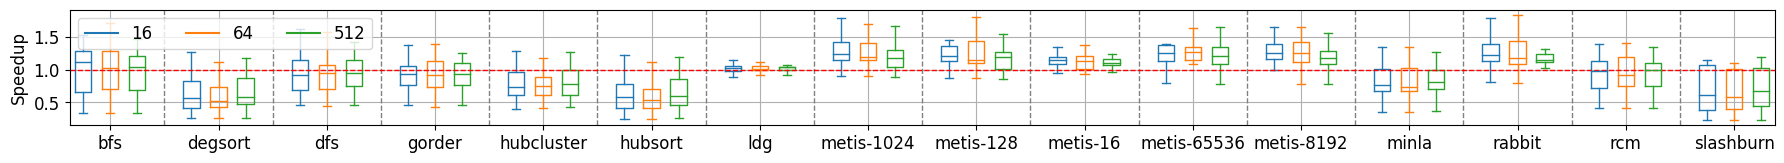

In [9]:
rows = []

plt.rcParams["figure.figsize"] = (22,1.5)
plt.rcParams.update({'font.size': 12})


exp =  experiments.copy()
num_features_combinations = [16,64,512] 
exp = exp[(((exp.hidden_dim == 16) & (exp.num_layers == 2) & (exp.system == "dgl") & (exp.infrastructure == "CPU")) & exp.num_features.isin(num_features_combinations))]



for i, d in exp.groupby(by=["system","infrastructure"]):
    g = d[["graph_name", "reordering_strategy", "hidden_dim"]].groupby(by=["graph_name", "reordering_strategy"],as_index=False).count()
    g = g[g["hidden_dim"]==2*len(num_features_combinations)]
    print(d[["graph_name","reordering_strategy", "hidden_dim"]].groupby(by=["graph_name", "reordering_strategy"], as_index=False).count()["hidden_dim"].min())
    d = d[d.graph_name.isin(list(g.graph_name.unique()))]  
    print(i)
    data_dict = {}
    reordering_strategies = list(d.reordering_strategy.unique())
    reordering_strategies.sort()
    graphs = list(d.graph_name.unique())
    graphs.sort()
    for reordering in reordering_strategies:
        data_dict[reordering] = {}
        for num_features in num_features_combinations:
            values = d[(d.num_features.isin([num_features])) & (d.reordering_strategy.isin([reordering]))]["speedup"].to_numpy() 
            data_dict[reordering][num_features] = values
            print(f"Reordering: {reordering} Features: {num_features} Values: {np.mean(values)}")
    save_as = "" #f"figures/amortization/{'_'.join(i)}"
    save_as = f"figures/gnn_parameters/feature/{'_'.join(i)}-boxplot"
    overview_box_plot(data_dict,xlabel="", ylabel="Speedup", yline=1,bbox_to_anchor=(0.5, 1.5), save_as=save_as, log=False)
    

Figures 5b and 5c

2
('dgl', 'GPU', 'GAT')
Reordering: bfs Features: 16 Values: 1.3399947058496522
Reordering: bfs Features: 64 Values: 1.339567816732812
Reordering: bfs Features: 512 Values: 1.336193234127524
Reordering: degsort Features: 16 Values: 1.0515271226704992
Reordering: degsort Features: 64 Values: 1.0510904113747668
Reordering: degsort Features: 512 Values: 1.0519127993627673
Reordering: dfs Features: 16 Values: 1.240193777539043
Reordering: dfs Features: 64 Values: 1.2406220571791817
Reordering: dfs Features: 512 Values: 1.232947658161755
Reordering: gorder Features: 16 Values: 1.2051558105542084
Reordering: gorder Features: 64 Values: 1.2043798822898364
Reordering: gorder Features: 512 Values: 1.1962866362654587
Reordering: hubcluster Features: 16 Values: 1.1377797405524606
Reordering: hubcluster Features: 64 Values: 1.1356807289674222
Reordering: hubcluster Features: 512 Values: 1.1292930438174145
Reordering: hubsort Features: 16 Values: 1.0708657240991277
Reordering: hubsort Features: 64 

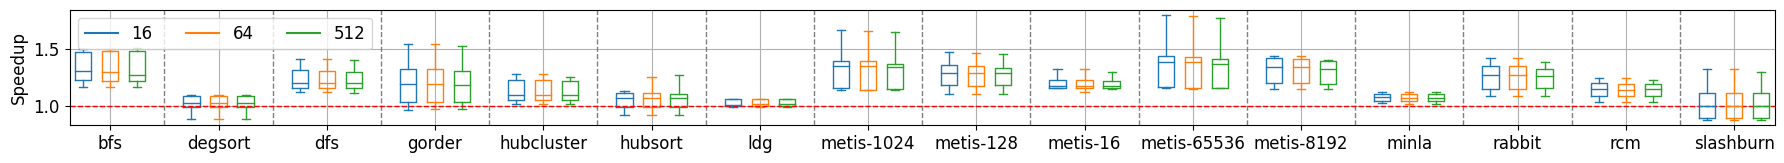

2
('dgl', 'GPU', 'GCN')
Reordering: bfs Features: 16 Values: 1.1383147349589466
Reordering: bfs Features: 64 Values: 1.1156716453064885
Reordering: bfs Features: 512 Values: 1.0870077569593528
Reordering: degsort Features: 16 Values: 1.0758462860332947
Reordering: degsort Features: 64 Values: 1.0773775934678225
Reordering: degsort Features: 512 Values: 1.0430748961422203
Reordering: dfs Features: 16 Values: 1.203660490756276
Reordering: dfs Features: 64 Values: 1.1817953593219275
Reordering: dfs Features: 512 Values: 1.100310547459563
Reordering: gorder Features: 16 Values: 1.2941460901724111
Reordering: gorder Features: 64 Values: 1.2870767364685207
Reordering: gorder Features: 512 Values: 1.1455088949079753
Reordering: hubcluster Features: 16 Values: 1.1421612348463144
Reordering: hubcluster Features: 64 Values: 1.1400536430255337
Reordering: hubcluster Features: 512 Values: 1.0719124902017882
Reordering: hubsort Features: 16 Values: 1.1073506303864051
Reordering: hubsort Features: 6

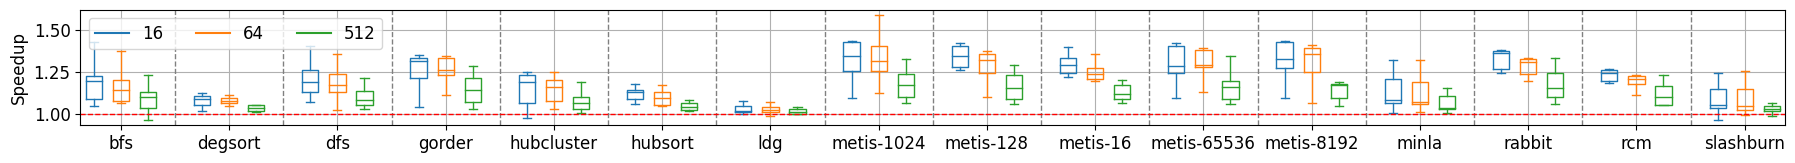

In [10]:
rows = []

plt.rcParams["figure.figsize"] = (22,1.5)
plt.rcParams.update({'font.size': 12})

exp =  experiments.copy()
num_features_combinations = [16,64,512] 
exp = exp[(((exp.hidden_dim == 16) & (exp.num_layers == 2) & (exp.system == "dgl") & (exp.infrastructure == "GPU")) & exp.num_features.isin(num_features_combinations))]

for i, d in exp.groupby(by=["system","infrastructure", "model"]):    
    g = d[["graph_name", "reordering_strategy", "hidden_dim"]].groupby(by=["graph_name", "reordering_strategy"],as_index=False).count()
    g = g[g["hidden_dim"]==len(num_features_combinations)]
    print(d[["graph_name","reordering_strategy", "hidden_dim"]].groupby(by=["graph_name", "reordering_strategy"], as_index=False).count()["hidden_dim"].min()) 
    d = d[d.graph_name.isin(list(g.graph_name.unique()) )]  
    
    print(i)
    data_dict = {}
    reordering_strategies = list(d.reordering_strategy.unique())
    reordering_strategies.sort()
    graphs = list(d.graph_name.unique())
    graphs.sort()
    for reordering in reordering_strategies:
        data_dict[reordering] = {}
        for num_features in num_features_combinations:
            values = d[(d.num_features.isin([num_features])) & (d.reordering_strategy.isin([reordering]))]["speedup"].to_numpy() 
            data_dict[reordering][num_features] = values
            print(f"Reordering: {reordering} Features: {num_features} Values: {np.mean(values)}")

    save_as = "" #f"figures/amortization/{'_'.join(i)}"
    save_as = f"figures/gnn_parameters/feature/{'_'.join(i)}-boxplot"
    overview_box_plot(data_dict,xlabel="", ylabel="Speedup", yline=1,bbox_to_anchor=(0.5, 1.5), save_as=save_as, log=False)
    

Figures 6a and 6c

6
('dgl', 'CPU')
[2, 3, 4]
Classes: [2, 3, 4]


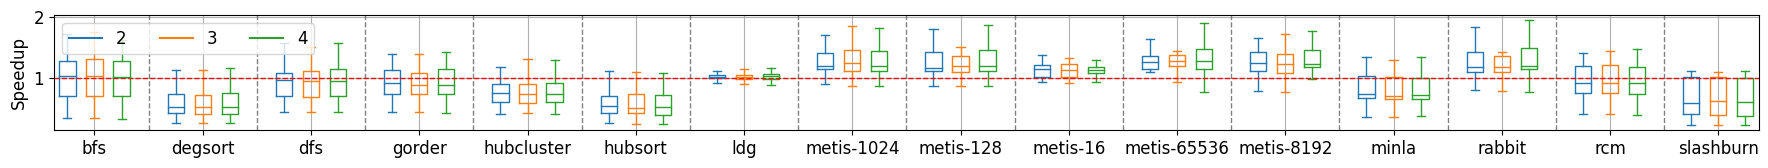

5
('dgl', 'GPU')
[2, 3, 4]
Classes: [2, 3, 4]


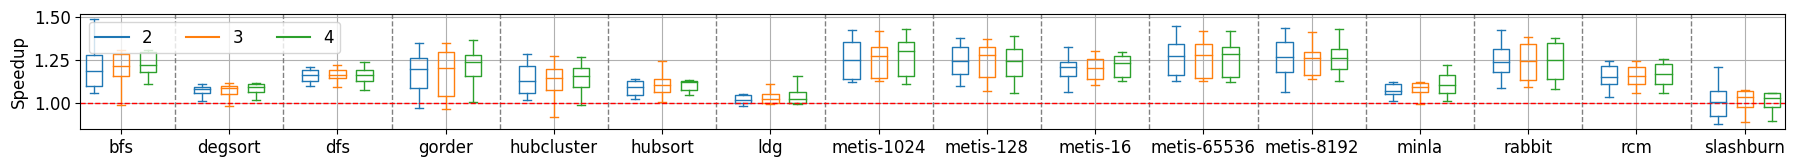

In [11]:
rows = []

plt.rcParams["figure.figsize"] = (22,1.5)
plt.rcParams.update({'font.size': 12})

exp = experiments.copy()

num_layers_combis = [2,3,4] 
exp = exp[(((exp.hidden_dim == 16) & (exp.num_features == 64) &(exp.system == "dgl")) & exp.num_layers.isin(num_layers_combis))]
 
for i, d in exp.groupby(by=["system","infrastructure"]):
    
    g = d[["graph_name", "reordering_strategy", "hidden_dim"]].groupby(by=["graph_name", "reordering_strategy"],as_index=False).count()
    g = g[g["hidden_dim"]==2*len(num_layers_combis)]
    print(d[["graph_name","reordering_strategy", "hidden_dim"]].groupby(by=["graph_name", "reordering_strategy"], as_index=False).count()["hidden_dim"].min())
    d = d[d.graph_name.isin(list(g.graph_name.unique()))]  
    
    print(i)
    data_dict = {}
    reordering_strategies = list(d.reordering_strategy.unique())
    reordering_strategies.sort()
    graphs = list(d.graph_name.unique())
    graphs.sort()
    for reordering in reordering_strategies:
        data_dict[reordering] = {}
        for num_layers in num_layers_combis:
            values = d[(d.num_layers.isin([num_layers])) & (d.reordering_strategy.isin([reordering]))]["speedup"].to_numpy() 
            data_dict[reordering][num_layers] = values
    save_as = "" #f"figures/amortization/{'_'.join(i)}"
    save_as = f"figures/gnn_parameters/layer/{'_'.join(i)}-boxplot"
    overview_box_plot(data_dict,xlabel="", ylabel="Speedup",yline=1, bbox_to_anchor=(0.5, 1.5), save_as=save_as, log=False)
    

Figure 2a

current slashburn
current minla
current gorder
current hubcluster
current hubsort
current degsort
current rcm
current dfs
current bfs
current ldg
current metis-16
current metis-128
current metis-1024
current metis-8192
current metis-65536
current rabbit
strategies ['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']
slashburn
minla
gorder
hubcluster
hubsort
degsort
rcm
dfs
bfs
ldg
metis-16
metis-128
metis-1024
metis-8192
metis-65536
rabbit
strategies ['degsort', 'hubsort', 'slashburn', 'ldg', 'hubcluster', 'minla', 'rcm', 'dfs', 'gorder', 'bfs', 'metis-16', 'metis-128', 'metis-1024', 'rabbit', 'metis-8192', 'metis-65536']
degsort
0.97
hubsort
0.98
slashburn
0.99
ldg
1.03
hubcluster
1.07
minla
1.07
rcm
1.15
dfs
1.15
gorder
1.16
bfs
1.18
metis-16
1.22
metis-128
1.28
metis-1024
1.3
rabbit
1.31
metis-8192
1.32
metis-65536
1.33



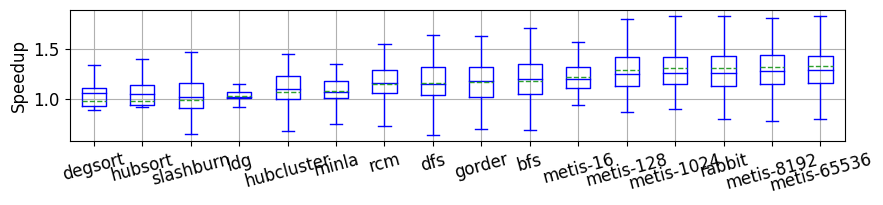

In [12]:

def order(reorderings):
    all = [
        'slashburn',
        'minla',
        'gorder', 
        'HubCluster', 
        'HubSort', 
        'DegSort', 
        'rcm',
        'dfs', 
        'bfs',
        'ldg',
        'metis-16', 
        'metis-128', 
        'metis-1024', 
        'metis-8192', 
        'metis-65536',
        'rabbit'
    ]
 #   print("input", reorderings)
    all = [a.lower() for a in all]
    
    reorderings = [a.lower() for a in reorderings if isinstance(a, str)]
    
    new = []
    for a in all:
        print("current", a)
        if a in reorderings:
            new.append(a)
  #          print("added1", a)
    for r in reorderings:
        if not r in new:
            new.append(r)
            print("added 2", r)
   # print("output:", new)
    return new
experiments_overview = experiments.copy()
experiments_overview = experiments_overview[
    (experiments_overview.num_features == 64) & 
    (experiments_overview.hidden_dim == 16) & 
    (experiments_overview.num_layers == 2) ]
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (10,1.7)
plt.rcParams.update({'font.size': 12})
reordering_strategiess = list(experiments_overview.reordering_strategy.unique())
reordering_strategies = order(reordering_strategiess)



values = []
print("strategies", reordering_strategies)
for s in reordering_strategies:
    print(s)
    v = experiments_overview[experiments_overview.reordering_strategy.isin([s])]["speedup"].to_numpy().tolist()
    values.append(v)
    #print(v)


means = [np.mean(sublist) for sublist in values]

combined = list(zip(means, reordering_strategies))

# Step 2: Sort the combined list based on the first element of each tuple
sorted_combined = sorted(combined, key=lambda x: x[0])

# Step 3: Unzip the sorted list back into two separate lists
a_sorted, b_sorted = zip(*sorted_combined)

# Convert back to lists (optional, if you need lists instead of tuples)
a_sorted = list(a_sorted)
b_sorted = list(b_sorted)


values = []
print("strategies", b_sorted)
for s in b_sorted:
    print(s)
    v = experiments_overview[experiments_overview.reordering_strategy.isin([s])]["speedup"].to_numpy().tolist()
    values.append(v)
    print(np.mean(v).round(2))

colors = ['peachpuff', 'orange', 'tomato']

fig, ax = plt.subplots()
ax.set_ylabel('Speedup')

print()
bp = ax.boxplot(values,
                   patch_artist=False,
                   labels=b_sorted,
                   showmeans=True,
                   showfliers=False,
                   meanline=True)  # will be used to label x-ticks

plt.setp(bp['boxes'], c="blue")
plt.setp(bp['whiskers'], c="blue")
plt.setp(bp['caps'], c="blue")
plt.setp(bp['medians'], c="blue")
plt.grid()
plt.xticks(rotation=15)
plt.savefig("figures/overview/overview.pdf", bbox_inches='tight')

In [13]:
idx = experiments.groupby(by=["infrastructure"])["speedup"].idxmax()
experiments.loc[idx][["infrastructure","speedup"]].round(2)

,infrastructure,speedup
2944,CPU,2.29
4468,GPU,2.43


In [14]:
experiments[experiments.reordering_strategy == "rabbit"][["infrastructure", "speedup"]].groupby(by=["infrastructure"]).max().round(2)

,speedup
infrastructure,
CPU,2.19
GPU,2.43


Reordering time and & metrics

Figure 9a

No
['bfs', 'degsort', 'dfs', 'gorder', 'hubcluster', 'hubsort', 'ldg', 'metis-1024', 'metis-128', 'metis-16', 'metis-65536', 'metis-8192', 'minla', 'rabbit', 'random', 'rcm', 'slashburn']


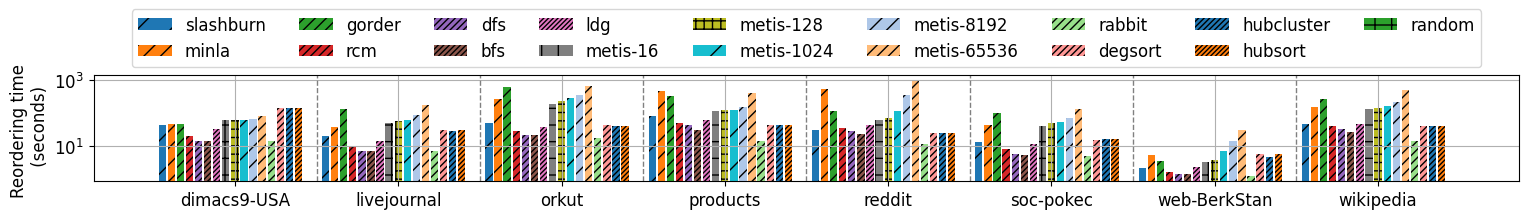

In [15]:
plt.rcParams["figure.figsize"] = (16,3.5)
plt.rcParams.update({'font.size': 12})
data_dict = {}
reordering_strategies = list(reordering_metrics.reordering_strategy.unique())
reordering_strategies.sort()
graphs = list(reordering_metrics.graph_name.unique())
graphs.sort()
for graph in graphs:
    data_dict[graph] = {}
    for reordering in reordering_strategies:
        values = reordering_metrics[(reordering_metrics.graph_name.isin([graph])) & (reordering_metrics.reordering_strategy.isin([reordering]))]["reordering_time"].to_numpy() 
        data_dict[graph][reordering] = np.around(values, decimals=1)
save = "figures/reordering-metrics/reordering-time"     
#grouped_bar(data_dict, log=True, hline=None,xlabel="Graph", ylabel="Reordering time (seconds)", numbers=True, save=save, bbox_to_anchor=(0.5, 1.30))  
grouped_bar(data_dict, log=True, hline=None,xlabel="", ylabel="Reordering time \n (seconds)", numbers=False, save=save, bbox_to_anchor=(0.5, 1.7), ncol=9)  

Figure 9b

No
['bfs', 'degsort', 'dfs', 'gorder', 'hubcluster', 'hubsort', 'ldg', 'metis-1024', 'metis-128', 'metis-16', 'metis-65536', 'metis-8192', 'minla', 'rabbit', 'random', 'rcm', 'slashburn']


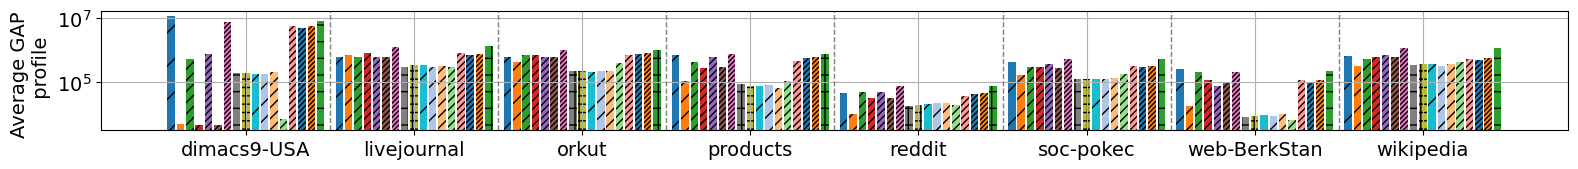

In [16]:
plt.rcParams["figure.figsize"] = (16,3.5)
plt.rcParams["figure.figsize"] = (16,1.9)
plt.rcParams.update({'font.size': 14})
data_dict = {}
reordering_strategies = list(reordering_metrics.reordering_strategy.unique())
reordering_strategies.sort()
graphs = list(reordering_metrics.graph_name.unique())
graphs.sort()
for graph in graphs:
    data_dict[graph] = {}
    for reordering in reordering_strategies:
        values = reordering_metrics[(reordering_metrics.graph_name.isin([graph])) & (reordering_metrics.reordering_strategy.isin([reordering]))]["avg_gap"].to_numpy() 
        values = np.around(values, 2)
        data_dict[graph][reordering] = np.around(values, decimals=1)
save = "figures/reordering-metrics/average_gap"   
#grouped_bar(data_dict, log=True, hline=None,xlabel="Graph", ylabel="Average GAP", numbers=True, save=save,bbox_to_anchor=(0.5, 1.35) )  
grouped_bar(data_dict, log=True, hline=None,xlabel="", ylabel="Average GAP \n profile", numbers=False, save=save,bbox_to_anchor=(0.5, 1.5), legend=False)  

Figure 9c

No
['bfs', 'degsort', 'dfs', 'gorder', 'hubcluster', 'hubsort', 'ldg', 'metis-1024', 'metis-128', 'metis-16', 'metis-65536', 'metis-8192', 'minla', 'rabbit', 'random', 'rcm', 'slashburn']


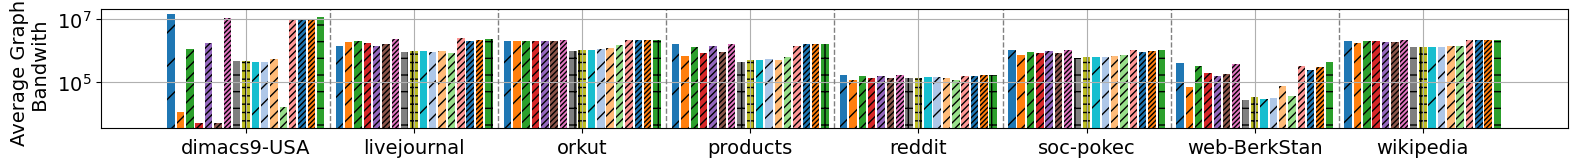

In [17]:
plt.rcParams["figure.figsize"] = (16,3.5)
plt.rcParams["figure.figsize"] = (16,1.9)
plt.rcParams.update({'font.size': 14})
data_dict = {}
reordering_strategies = list(reordering_metrics.reordering_strategy.unique())
reordering_strategies.sort()
graphs = list(reordering_metrics.graph_name.unique())
graphs.sort()
for graph in graphs:
    data_dict[graph] = {}
    for reordering in reordering_strategies:
        values = reordering_metrics[(reordering_metrics.graph_name.isin([graph])) & (reordering_metrics.reordering_strategy.isin([reordering]))]["avg_bandwidth"].to_numpy() 
        data_dict[graph][reordering] = np.around(values, decimals=1)
save = "figures/reordering-metrics/average_graph_bandwidth"   
#grouped_bar(data_dict, log=True, hline=None,xlabel="Graph", ylabel="Average Graph Bandwith", numbers=True, save=save,  bbox_to_anchor=(0.5, 1.30))  
grouped_bar(data_dict, log=True, hline=None,xlabel="", ylabel="Average Graph \n Bandwith", numbers=False, save=save, bbox_to_anchor=(0.5, 1.50), legend=False)  

Figure 9d

No
['bfs', 'degsort', 'dfs', 'gorder', 'hubcluster', 'hubsort', 'ldg', 'metis-1024', 'metis-128', 'metis-16', 'metis-65536', 'metis-8192', 'minla', 'rabbit', 'random', 'rcm', 'slashburn']


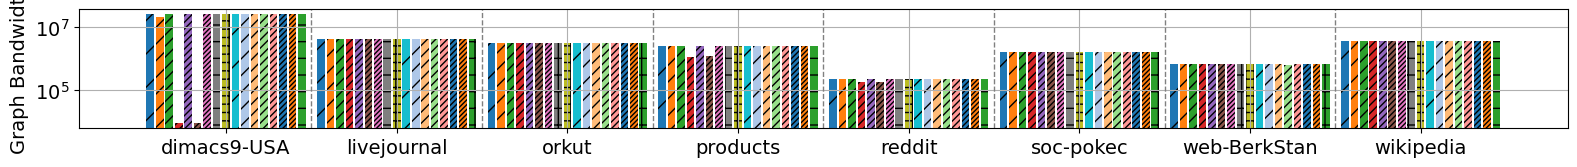

In [18]:
plt.rcParams["figure.figsize"] = (16,3.5)
plt.rcParams["figure.figsize"] = (16,1.9)
plt.rcParams.update({'font.size': 14})
data_dict = {}
reordering_strategies = list(reordering_metrics.reordering_strategy.unique())
reordering_strategies.sort()
graphs = list(reordering_metrics.graph_name.unique())
graphs.sort()
for graph in graphs:
    data_dict[graph] = {}
    for reordering in reordering_strategies:
        values = reordering_metrics[(reordering_metrics.graph_name.isin([graph])) & (reordering_metrics.reordering_strategy.isin([reordering]))]["max_bandwidth"].to_numpy() 
        data_dict[graph][reordering] = np.around(values, decimals=1)
save = "figures/reordering-metrics/graph_bandwidth"   
#grouped_bar(data_dict, log=True, hline=None,xlabel="Graph", ylabel="Graph Bandwidth", numbers=True, save=save )  
grouped_bar(data_dict, log=True, hline=None,xlabel="", ylabel="Graph Bandwidth", numbers=False, save=save, bbox_to_anchor=(0.5, 1.40),legend=False)  

Quality metrics vs. speedup

Figure 10


avg_bandwidth_normalized

('soc-pokec', 'dgl', 'GCN')
CPU
GPU


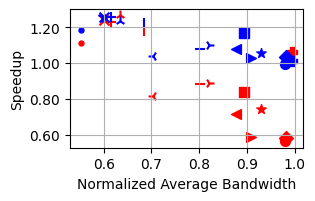

('soc-pokec', 'pyg', 'GCN')
CPU
GPU


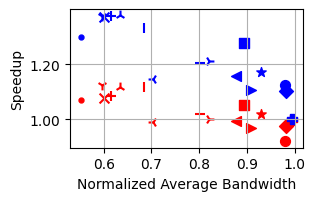

('wikipedia', 'dgl', 'GCN')
CPU
GPU


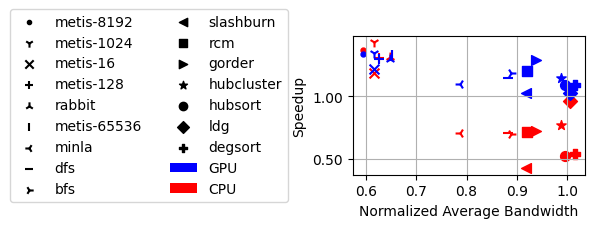

('wikipedia', 'pyg', 'GCN')
CPU
GPU


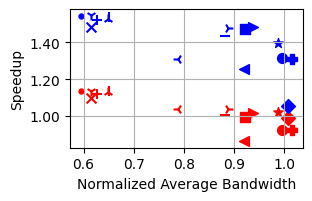

In [19]:

plt.rcParams["figure.figsize"] = (7.5,1.8)
plt.rcParams["figure.figsize"] = (3,1.8)
plt.rcParams.update({'font.size': 10})
from matplotlib.ticker import FuncFormatter

c = 0
rows = []
for metric in [
    "avg_bandwidth_normalized",
    ]:
    print()
    print(metric)
    print()
    e = filter(experiments.copy(), system=["dgl", "pyg"], graphs=["wikipedia","soc-pokec"]) # Figure 9
    #e = filter(experiments.copy(), system=["dgl", "pyg"], graphs=["wikipedia"]) # Figure 9
   # print(e)
    for i, d in e.groupby(by=["graph_name", "system", "model" ]):
        print(i)
        df = d[[f"{metric}", "speedup", "reordering_strategy"]].groupby(by="reordering_strategy", as_index=False).mean()
        df = df.sort_values(by=metric)
        labels = df["reordering_strategy"].to_numpy()
        x= df[f"{metric}"].to_numpy()
        markers = ['.', '1', 'x', '+', '2', '|', '3', '_', '4', '<', ',', '>', '*', 'o', 'D', 'P']
        markers = markers[0:len(labels)]
        for marker, name in zip(markers, labels):
            plt.scatter([], [], marker=marker, label=name, color="black")
        infra2color = {
            "GPU": "blue",
            "CPU": "red"
        }
        col = 0
        for ii, dd in d.groupby(by="infrastructure"):
            print(ii)
            col = (col + 1) %2
            #infrastructure
            df = dd[[f"{metric}", "speedup", "reordering_strategy"]].groupby(by="reordering_strategy", as_index=False).mean()
            df = df.sort_values(by=metric)
            x = df[f"{metric}"].to_numpy()
            y = df["speedup"].to_numpy()
            labels= df["reordering_strategy"].to_numpy()
            for pos in range(len(x)):
                plt.scatter(x[pos], y[pos], marker=markers[pos], c=infra2color[ii], s=50)
    
        plt.bar([1], [0], width=0, label="GPU",  color=infra2color["GPU"])
        plt.bar([1], [0],  width=0, label="CPU",  color=infra2color["CPU"])
        
      #  plt.xlabel(get_metric_name(metric) + " (normalized with random reordering)")
        plt.xlabel("Normalized "+  get_metric_name(metric))
        plt.ylabel("Speedup")
        plt.grid()
        #plt.xscale('log')
        #plt.legend()
        #plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.65), shadow=False, ncol=5)
        if c == 2:
            plt.legend(loc='center right', bbox_to_anchor=(-0.25, 0.5), shadow=False, ncol=2)
        c+=1
        
        
        def format_ticks(x, _):
            return f"{x:.2f}"
        
        plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
        
        plt.savefig(f"figures/reordering-metrics/speedup/{metric}_{i[0]}_{i[1]}_{i[2]}.pdf", bbox_inches='tight')
        plt.show()



correlation between reordering metrics and speedup

Table 3 first columns

In [20]:
plt.rcParams["figure.figsize"] = (6,3)
plt.rcParams.update({'font.size': 8})
from scipy.stats import spearmanr
rows = []

r = experiments.copy()
for metric in [
    "avg_gap_speedup",
    "avg_bandwidth_speedup",
    "max_bandwidth_speedup",
    ]:
    for i, d in r.groupby(by=["graph_name","infrastructure", "system", "num_features","num_layers","hidden_dim", "model" ]):
        pearson_corr = d[metric].corr(d['speedup'])
        coef, _ = spearmanr(d[metric], d['speedup'])
        rows.append({
            "pearson": pearson_corr, 
            "spearman": coef,
            "metric": metric,
            "system": i[2],
           # "graph_name": i[0],
          #  "infrastructure": i[1]
        })
        
d = pd.DataFrame(rows)
d['pearson'] = d['pearson'].round(2)
d['spearman'] = d['spearman'].round(2)

paper_table = d.groupby(by=["metric", "system"], as_index=False).mean()
paper_table['pearson'] = paper_table['pearson'].round(2)
paper_table['spearman'] = paper_table['spearman'].round(2)

paper_table['system'] = paper_table['system'].replace('dgl', 'DGL')
paper_table['system'] = paper_table['system'].replace('pyg', 'PyG')

paper_table['metric'] = paper_table['metric'].replace('avg_bandwidth_speedup', 'Average graph bandwidth')
paper_table['metric'] = paper_table['metric'].replace('avg_gap_speedup', 'Average gap profile')
paper_table['metric'] = paper_table['metric'].replace('max_bandwidth_speedup', 'Graph bandwidth')

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None) # Show full content of each cell

paper_table = paper_table.sort_values(by=["metric", "system"])
#print(paper_table.to_latex(index=False, escape=False))


paper_table

,metric,system,pearson,spearman
2,Average gap profile,DGL,0.58,0.63
3,Average gap profile,PyG,0.56,0.64
0,Average graph bandwidth,DGL,0.61,0.64
1,Average graph bandwidth,PyG,0.58,0.64
4,Graph bandwidth,DGL,0.11,0.30
5,Graph bandwidth,PyG,0.13,0.29


Strategy selection

Table 3 last columns

In [21]:
rows = []
for system in ["dgl", "pyg"]:
    for metric in[
        "avg_gap",
        "avg_bandwidth",
        "max_bandwidth",
        ]:
        e = experiments.copy()
        e = e[(e.system == system)]
        e["best"] = 0
        e["selected"] = 0
        idx = e.groupby(by=["system","infrastructure", "graph_name", "num_layers", "hidden_dim", "num_features", "model"])["speedup"].idxmax()
        idx1 = e.groupby(by=["system","infrastructure", "graph_name", "num_layers", "hidden_dim", "num_features", "model"])[metric].idxmin()
        random = e[["system","infrastructure", "graph_name", "num_layers", "hidden_dim", "num_features", "model","speedup" ]].groupby(by=["system","infrastructure", "graph_name", "num_layers", "hidden_dim", "num_features", "model"], as_index = False).mean()["speedup"].mean() 
        e.loc[idx, "best"] = 1
        e.loc[idx1, "selected"] = 1
        rows.append({
            "metric": metric, 
            "speedup": e[e.selected == 1]["speedup"].mean(), 
            "optimal": e[e.best == 1]["speedup"].mean(), 
            "random":random, 
            "system": system
        })
        print(rows[-1])
paper_table = pd.DataFrame(rows).sort_values(by="speedup")

paper_table["random"] = paper_table["random"].round(2) 
paper_table["speedup"] = paper_table["speedup"].round(2) 
paper_table["optimal"] = paper_table["optimal"].round(2) 
paper_table.sort_values(["metric", "system"])

paper_table['metric'] = paper_table['metric'].replace('avg_bandwidth', 'Average graph bandwidth')
paper_table['metric'] = paper_table['metric'].replace('avg_gap', 'Average gap profile')
paper_table['metric'] = paper_table['metric'].replace('max_bandwidth', 'Graph bandwidth')
paper_table['system'] = paper_table['system'].replace('dgl', 'DGL')
paper_table['system'] = paper_table['system'].replace('pyg', 'PyG')
paper_table = paper_table[["metric", "system", "optimal", "speedup", "random"]]
paper_table = paper_table.sort_values(by=["metric", "system"])
#print(paper_table.to_latex(index=False, escape=False))
paper_table



{'metric': 'avg_gap', 'speedup': 1.2054657731990388, 'optimal': 1.3873232698321334, 'random': 1.096075580570191, 'system': 'dgl'}
{'metric': 'avg_bandwidth', 'speedup': 1.2057420448592555, 'optimal': 1.3873232698321334, 'random': 1.096075580570191, 'system': 'dgl'}
{'metric': 'max_bandwidth', 'speedup': 1.0980607261680122, 'optimal': 1.3873232698321334, 'random': 1.096075580570191, 'system': 'dgl'}
{'metric': 'avg_gap', 'speedup': 1.2425807524900367, 'optimal': 1.3097631191409849, 'random': 1.1863811425777515, 'system': 'pyg'}
{'metric': 'avg_bandwidth', 'speedup': 1.2450279147171688, 'optimal': 1.3097631191409849, 'random': 1.1863811425777515, 'system': 'pyg'}
{'metric': 'max_bandwidth', 'speedup': 1.2161441519963128, 'optimal': 1.3097631191409849, 'random': 1.1863811425777515, 'system': 'pyg'}


,metric,system,optimal,speedup,random
0,Average gap profile,DGL,1.39,1.21,1.10
3,Average gap profile,PyG,1.31,1.24,1.19
1,Average graph bandwidth,DGL,1.39,1.21,1.10
4,Average graph bandwidth,PyG,1.31,1.25,1.19
2,Graph bandwidth,DGL,1.39,1.10,1.10
5,Graph bandwidth,PyG,1.31,1.22,1.19


cpu vs gpu effectiveness

In [22]:
dgl = experiments.copy()
dgl_cpu = dgl[(dgl.infrastructure == "CPU")&(dgl.system == "dgl")]
dgl_cuda = dgl[(dgl.infrastructure == "GPU") &(dgl.system == "dgl")]

dgl_cpu.rename(columns={'speedup': 'speedup_cpu'}, inplace=True)
dgl_cuda.rename(columns={'speedup': 'speedup_gpu'}, inplace=True)


dgl_cpu = dgl_cpu.drop(columns=["avg_gap", "avg_bandwidth", "max_bandwidth" ,"avg_aid","reordering_time", "system"])
dgl_cpu = dgl_cpu.drop(columns=["time", "infrastructure"])
dgl_cuda = dgl_cuda.drop(columns=["time", "infrastructure"])

conf = ["model", "graph_name", "num_features", "num_layers", "hidden_dim", "reordering_strategy"]
dgl_filtered = pd.merge(dgl_cpu, dgl_cuda, on=conf)

pyg = experiments.copy()
pyg_cpu = pyg[(pyg.infrastructure == "CPU")&(pyg.system == "pyg")]
pyg_cuda = pyg[(pyg.infrastructure == "GPU") &(pyg.system == "pyg")]

pyg_cpu.rename(columns={'speedup': 'speedup_cpu'}, inplace=True)
pyg_cuda.rename(columns={'speedup': 'speedup_gpu'}, inplace=True)


pyg_cpu = pyg_cpu.drop(columns=["avg_gap", "avg_bandwidth", "max_bandwidth" ,"avg_aid","reordering_time", "system"])
pyg_cpu = pyg_cpu.drop(columns=["time",  "infrastructure"])
pyg_cuda = pyg_cuda.drop(columns=["time", "infrastructure"])

conf = ["model", "graph_name", "num_features", "num_layers", "hidden_dim", "reordering_strategy"]
pyg_filtered = pd.merge(pyg_cpu, pyg_cuda, on=conf)

/var/folders/kk/7pm_3lhj6dzb_8z55dm9mwzm0000gn/T/ipykernel_95634/2437170267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dgl_cpu.rename(columns={'speedup': 'speedup_cpu'}, inplace=True)
/var/folders/kk/7pm_3lhj6dzb_8z55dm9mwzm0000gn/T/ipykernel_95634/2437170267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dgl_cuda.rename(columns={'speedup': 'speedup_gpu'}, inplace=True)
/var/folders/kk/7pm_3lhj6dzb_8z55dm9mwzm0000gn/T/ipykernel_95634/2437170267.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [23]:
dgl_filtered_agg = dgl_filtered[["reordering_strategy", "speedup_cpu", "speedup_gpu"]].groupby(by=["reordering_strategy"],as_index=False).mean()
dgl_filtered_agg["speedup_gpu/speedup_cpu"] = dgl_filtered_agg["speedup_gpu"] / dgl_filtered_agg["speedup_cpu"]
print(dgl_filtered_agg.sort_values(by="speedup_gpu")[["speedup_cpu", "speedup_gpu","speedup_gpu/speedup_cpu"]].mean())


speedup_cpu                0.987182
speedup_gpu                1.200529
speedup_gpu/speedup_cpu    1.277251
dtype: float64


In [24]:
pyg_filtered_agg = pyg_filtered[["reordering_strategy", "speedup_cpu", "speedup_gpu"]].groupby(by=["reordering_strategy"],as_index=False).mean()
pyg_filtered_agg["speedup_gpu/speedup_cpu"] = pyg_filtered_agg["speedup_gpu"] / pyg_filtered_agg["speedup_cpu"]
pyg_filtered_agg.sort_values(by="speedup_gpu/speedup_cpu")
print(pyg_filtered_agg.sort_values(by="speedup_gpu")[["speedup_cpu", "speedup_gpu","speedup_gpu/speedup_cpu"]].mean())



speedup_cpu                1.095100
speedup_gpu                1.288000
speedup_gpu/speedup_cpu    1.174357
dtype: float64


In [25]:
dgL_cpu_gpu_speedups = dgl_filtered[["reordering_strategy", "graph_name", "speedup_cpu", "speedup_gpu"]].groupby(by=["reordering_strategy", "graph_name"], as_index=False).mean()
pyg_cpu_gpu_speedups = pyg_filtered[["reordering_strategy", "graph_name", "speedup_cpu", "speedup_gpu"]].groupby(by=["reordering_strategy", "graph_name"], as_index=False).mean()
#dgL_cpu_gpu_speedups


Figures 8a and 8b

just for numbers

current slashburn
current minla
current gorder
current hubcluster
current hubsort
current degsort
current rcm
current dfs
current bfs
current ldg
current metis-16
current metis-128
current metis-1024
current metis-8192
current metis-65536
current rabbit
No
['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


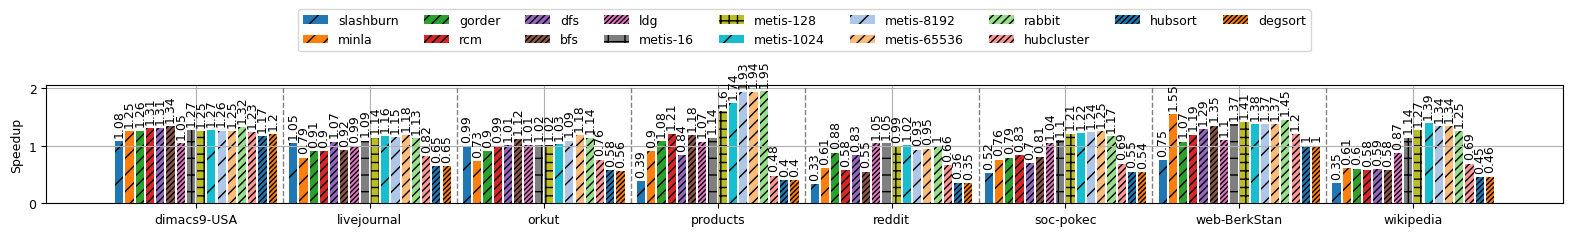

No
['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


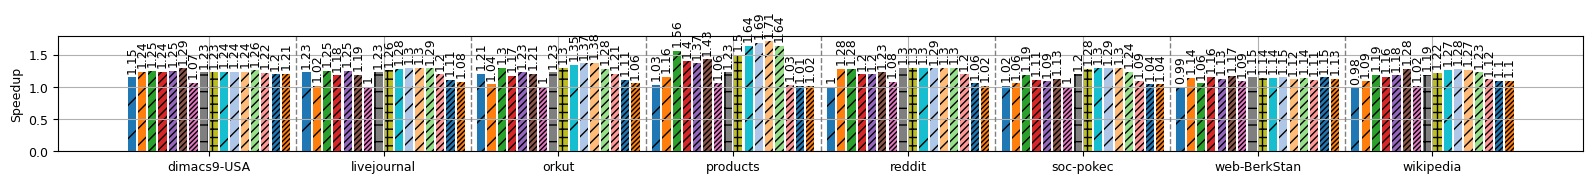

In [26]:
plt.rcParams["figure.figsize"] = (16,3.5)
plt.rcParams["figure.figsize"] = (16,3.5)
plt.rcParams.update({'font.size': 9})
d = dgL_cpu_gpu_speedups
data_dict = {}

classes = order(list(d.reordering_strategy.unique()))
groups = list(d["graph_name"].unique())
groups.sort()


for group in groups:
    data_dict[f"{group}"] = {}
    for cl in classes:
        values = d[(d["graph_name"].isin([group])) & (d.reordering_strategy.isin([cl]))]["speedup_cpu"].to_numpy() 
        values = np.around(values, 2)
        data_dict[f"{group}"][cl] = values
save = f"figures/gpu-vs-cpu/dgl-cpu"
#grouped_bar(data_dict, xlabel="Graph Reordering Strategy", ylabel="Speedup", numbers=True, save=save ) 
grouped_bar(data_dict, xlabel="", ylabel="Speedup", numbers=True, save=save,bbox_to_anchor=(0.5, 1.7), ncol=9) 


plt.rcParams["figure.figsize"] = (16,1.9)
plt.rcParams.update({'font.size': 9})
for group in groups:
    data_dict[f"{group}"] = {}
    for cl in classes:
        values = d[(d["graph_name"].isin([group])) & (d.reordering_strategy.isin([cl]))]["speedup_gpu"].to_numpy() 
        values = np.around(values, 2)
        data_dict[f"{group}"][cl] = values
save = f"figures/gpu-vs-cpu/dgl-gpu"
#grouped_bar(data_dict, xlabel="Graph Reordering Strategy", ylabel="Speedup", numbers=True, save=save ) 
grouped_bar(data_dict, xlabel="", ylabel="Speedup", numbers=True, save=save, legend=False) 




plots

current slashburn
current minla
current gorder
current hubcluster
current hubsort
current degsort
current rcm
current dfs
current bfs
current ldg
current metis-16
current metis-128
current metis-1024
current metis-8192
current metis-65536
current rabbit
No
['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


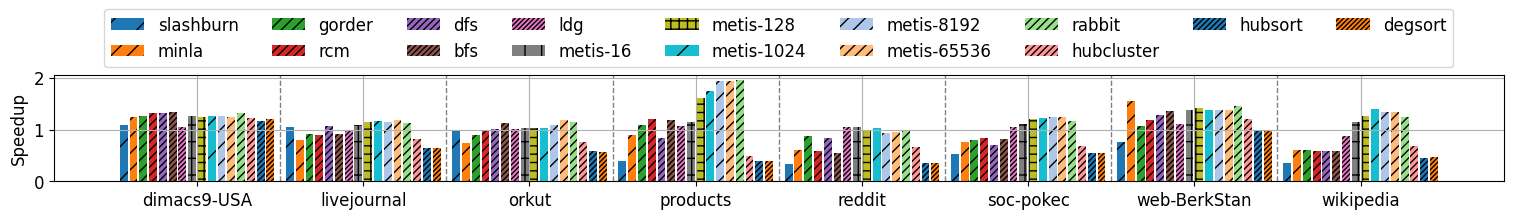

No
['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


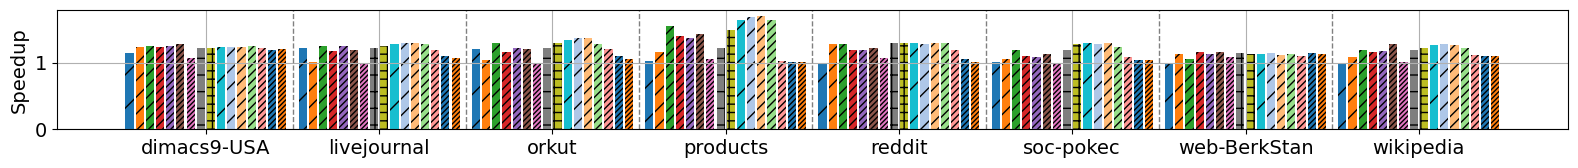

In [27]:
plt.rcParams["figure.figsize"] = (16,3.5)
plt.rcParams["figure.figsize"] = (16,3.5)
plt.rcParams.update({'font.size': 12})
d = dgL_cpu_gpu_speedups
data_dict = {}

classes = order(list(d.reordering_strategy.unique()))
groups = list(d["graph_name"].unique())
groups.sort()


for group in groups:
    data_dict[f"{group}"] = {}
    for cl in classes:
        values = d[(d["graph_name"].isin([group])) & (d.reordering_strategy.isin([cl]))]["speedup_cpu"].to_numpy() 
        values = np.around(values, 2)
        data_dict[f"{group}"][cl] = values
save = f"figures/gpu-vs-cpu/dgl-cpu"
#grouped_bar(data_dict, xlabel="Graph Reordering Strategy", ylabel="Speedup", numbers=True, save=save ) 
grouped_bar(data_dict, xlabel="", ylabel="Speedup", numbers=False, save=save,bbox_to_anchor=(0.5, 1.7), ncol=9) 


plt.rcParams["figure.figsize"] = (16,1.9)
plt.rcParams.update({'font.size': 14})
for group in groups:
    data_dict[f"{group}"] = {}
    for cl in classes:
        values = d[(d["graph_name"].isin([group])) & (d.reordering_strategy.isin([cl]))]["speedup_gpu"].to_numpy() 
        values = np.around(values, 2)
        data_dict[f"{group}"][cl] = values
save = f"figures/gpu-vs-cpu/dgl-gpu"
#grouped_bar(data_dict, xlabel="Graph Reordering Strategy", ylabel="Speedup", numbers=True, save=save ) 
grouped_bar(data_dict, xlabel="", ylabel="Speedup", numbers=False, save=save, legend=False) 




Figures 8c and 8d

just for numbers

current slashburn
current minla
current gorder
current hubcluster
current hubsort
current degsort
current rcm
current dfs
current bfs
current ldg
current metis-16
current metis-128
current metis-1024
current metis-8192
current metis-65536
current rabbit
No
['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


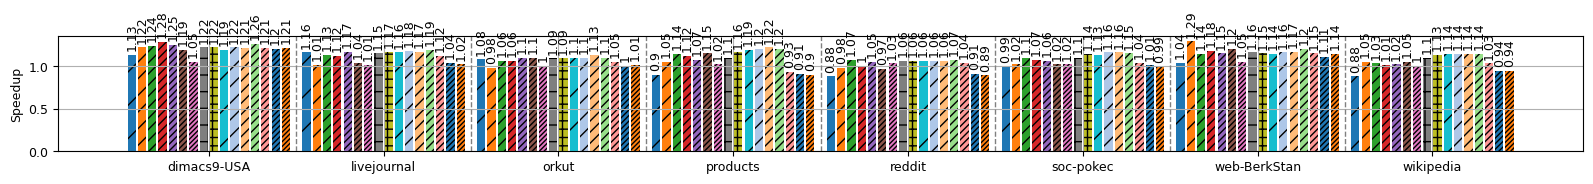

No
['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


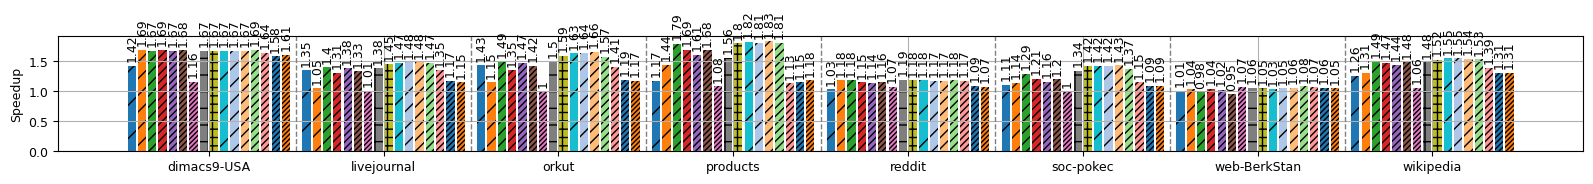

In [28]:
plt.rcParams["figure.figsize"] = (16,3)
plt.rcParams.update({'font.size': 9})
plt.rcParams["figure.figsize"] = (16,1.9)
plt.rcParams.update({'font.size': 9})
d = pyg_cpu_gpu_speedups
data_dict = {}

classes = order(list(d.reordering_strategy.unique()))
groups = list(d["graph_name"].unique())
groups.sort()


for group in groups:
    data_dict[f"{group}"] = {}
    for cl in classes:
        values = d[(d["graph_name"].isin([group])) & (d.reordering_strategy.isin([cl]))]["speedup_cpu"].to_numpy() 
        values = np.around(values, 2)
        data_dict[f"{group}"][cl] = values
save = f"figures/gpu-vs-cpu/pyg-cpu"
#grouped_bar(data_dict, xlabel="Graph Reordering Strategy", ylabel="Speedup", numbers=True, save=save ) 
grouped_bar(data_dict, xlabel="", ylabel="Speedup", numbers=True, save=save,legend=False ) 


for group in groups:
    data_dict[f"{group}"] = {}
    for cl in classes:
        values = d[(d["graph_name"].isin([group])) & (d.reordering_strategy.isin([cl]))]["speedup_gpu"].to_numpy() 
        values = np.around(values, 2)
        data_dict[f"{group}"][cl] = values
save = f"figures/gpu-vs-cpu/pyg-gpu"
#grouped_bar(data_dict, xlabel="Graph Reordering Strategy", ylabel="Speedup", numbers=True, save=save ) 
grouped_bar(data_dict, xlabel="", ylabel="Speedup", numbers=True, save=save,legend=False ) 






current slashburn
current minla
current gorder
current hubcluster
current hubsort
current degsort
current rcm
current dfs
current bfs
current ldg
current metis-16
current metis-128
current metis-1024
current metis-8192
current metis-65536
current rabbit
No
['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


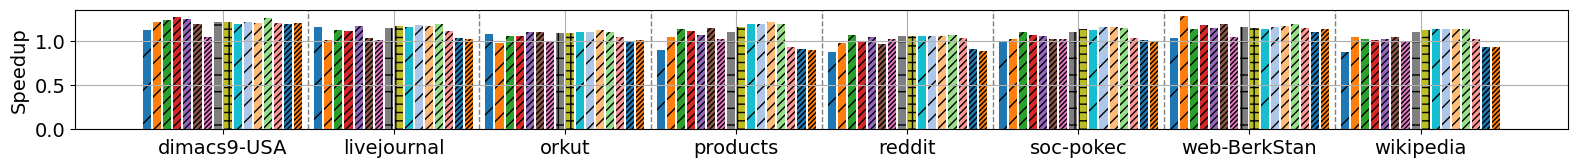

No
['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


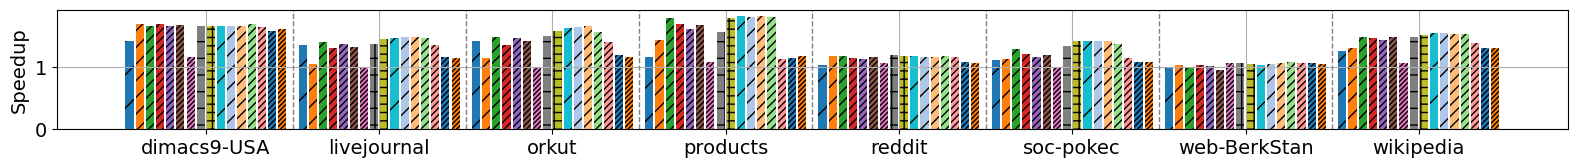

In [29]:
plt.rcParams["figure.figsize"] = (16,3)
plt.rcParams.update({'font.size': 9})
plt.rcParams["figure.figsize"] = (16,1.9)
plt.rcParams.update({'font.size': 14})
d = pyg_cpu_gpu_speedups
data_dict = {}

classes = order(list(d.reordering_strategy.unique()))
groups = list(d["graph_name"].unique())
groups.sort()


for group in groups:
    data_dict[f"{group}"] = {}
    for cl in classes:
        values = d[(d["graph_name"].isin([group])) & (d.reordering_strategy.isin([cl]))]["speedup_cpu"].to_numpy() 
        values = np.around(values, 2)
        data_dict[f"{group}"][cl] = values
save = f"figures/gpu-vs-cpu/pyg-cpu"
#grouped_bar(data_dict, xlabel="Graph Reordering Strategy", ylabel="Speedup", numbers=True, save=save ) 
grouped_bar(data_dict, xlabel="", ylabel="Speedup", numbers=False, save=save,legend=False ) 


for group in groups:
    data_dict[f"{group}"] = {}
    for cl in classes:
        values = d[(d["graph_name"].isin([group])) & (d.reordering_strategy.isin([cl]))]["speedup_gpu"].to_numpy() 
        values = np.around(values, 2)
        data_dict[f"{group}"][cl] = values
save = f"figures/gpu-vs-cpu/pyg-gpu"
#grouped_bar(data_dict, xlabel="Graph Reordering Strategy", ylabel="Speedup", numbers=True, save=save ) 
grouped_bar(data_dict, xlabel="", ylabel="Speedup", numbers=False, save=save,legend=False ) 






amortization

('dgl', 'CPU', 'GAT')
current slashburn
current minla
current gorder
current hubcluster
current hubsort
current degsort
current rcm
current dfs
current bfs
current ldg
current metis-16
current metis-128
current metis-1024
current metis-8192
current metis-65536
current rabbit
Classes: ['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


/Users/nikolaimerkel/development/gnn-paper-plots/virtualenv-example/env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nikolaimerkel/development/gnn-paper-plots/virtualenv-example/env/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


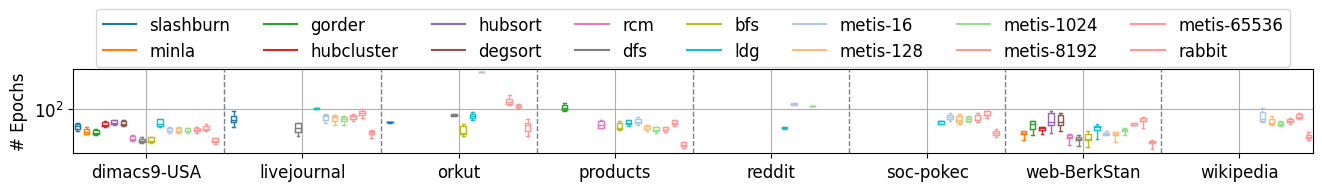

('dgl', 'CPU', 'GCN')
current slashburn
current minla
current gorder
current hubcluster
current hubsort
current degsort
current rcm
current dfs
current bfs
current ldg
current metis-16
current metis-128
current metis-1024
current metis-8192
current metis-65536
current rabbit
Classes: ['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


/Users/nikolaimerkel/development/gnn-paper-plots/virtualenv-example/env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nikolaimerkel/development/gnn-paper-plots/virtualenv-example/env/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


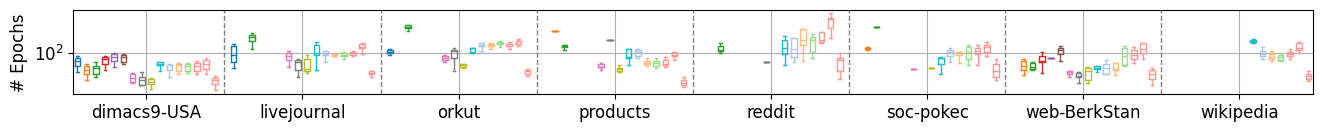

('dgl', 'GPU', 'GAT')
current slashburn
current minla
current gorder
current hubcluster
current hubsort
current degsort
current rcm
current dfs
current bfs
current ldg
current metis-16
current metis-128
current metis-1024
current metis-8192
current metis-65536
current rabbit
Classes: ['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


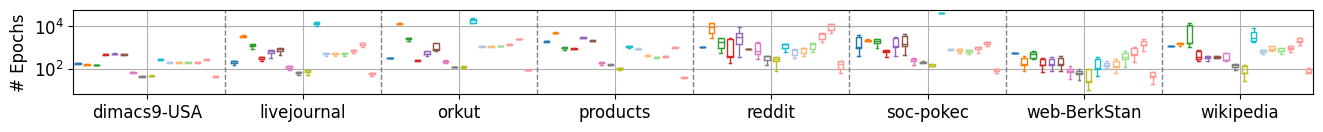

('dgl', 'GPU', 'GCN')
current slashburn
current minla
current gorder
current hubcluster
current hubsort
current degsort
current rcm
current dfs
current bfs
current ldg
current metis-16
current metis-128
current metis-1024
current metis-8192
current metis-65536
current rabbit
Classes: ['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


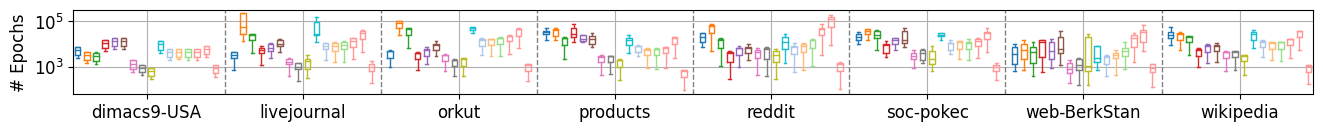

('pyg', 'CPU', 'GAT')
current slashburn
current minla
current gorder
current hubcluster
current hubsort
current degsort
current rcm
current dfs
current bfs
current ldg
current metis-16
current metis-128
current metis-1024
current metis-8192
current metis-65536
current rabbit
Classes: ['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


/Users/nikolaimerkel/development/gnn-paper-plots/virtualenv-example/env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nikolaimerkel/development/gnn-paper-plots/virtualenv-example/env/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


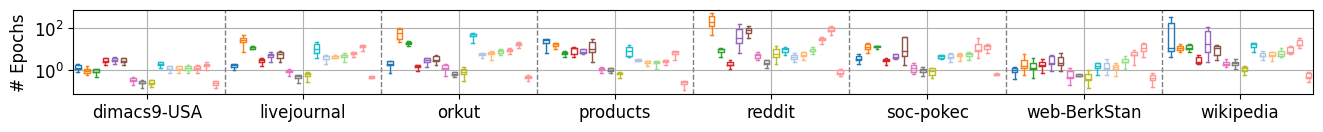

('pyg', 'CPU', 'GCN')
current slashburn
current minla
current gorder
current hubcluster
current hubsort
current degsort
current rcm
current dfs
current bfs
current ldg
current metis-16
current metis-128
current metis-1024
current metis-8192
current metis-65536
current rabbit
Classes: ['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


/Users/nikolaimerkel/development/gnn-paper-plots/virtualenv-example/env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nikolaimerkel/development/gnn-paper-plots/virtualenv-example/env/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


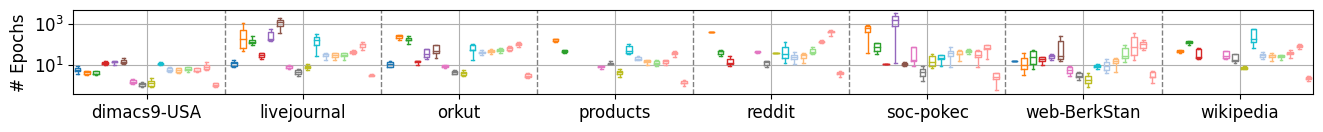

('pyg', 'GPU', 'GAT')
current slashburn
current minla
current gorder
current hubcluster
current hubsort
current degsort
current rcm
current dfs
current bfs
current ldg
current metis-16
current metis-128
current metis-1024
current metis-8192
current metis-65536
current rabbit
Classes: ['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


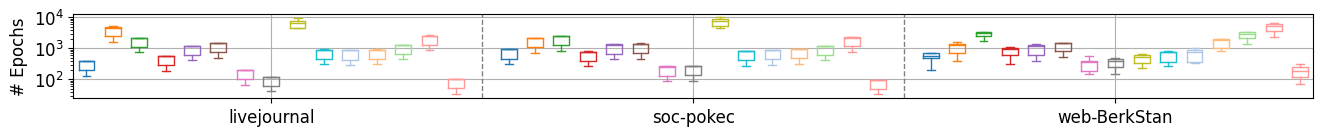

('pyg', 'GPU', 'GCN')
current slashburn
current minla
current gorder
current hubcluster
current hubsort
current degsort
current rcm
current dfs
current bfs
current ldg
current metis-16
current metis-128
current metis-1024
current metis-8192
current metis-65536
current rabbit
Classes: ['slashburn', 'minla', 'gorder', 'hubcluster', 'hubsort', 'degsort', 'rcm', 'dfs', 'bfs', 'ldg', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'rabbit']


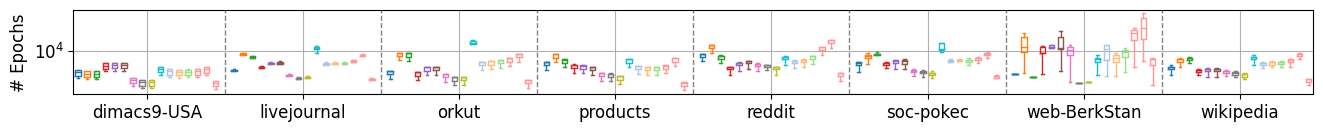

In [30]:
rows = []
cpu_amortization = experiments.copy()
cpu_amortization_possible = cpu_amortization[cpu_amortization.epochs_to_amortize >= 0]
plt.rcParams["figure.figsize"] = (22,1.5)
plt.rcParams.update({'font.size': 12})

for i, d in cpu_amortization_possible.groupby(by=["system","infrastructure", "model"]):
    print(i)
    data_dict = {}
    reordering_strategies = list(d.reordering_strategy.unique())
    reordering_strategies.sort()
    graphs = list(d.graph_name.unique())
    graphs.sort()
    for graph in graphs:
        data_dict[graph] = {}
        for reordering in reordering_strategies:
            values = d[(d.graph_name.isin([graph])) & (d.reordering_strategy.isin([reordering]))]["epochs_to_amortize"].to_numpy() 
            data_dict[graph][reordering] = values
        #    print(graph, reordering, np.median(values), np.mean(values))
            rows.append({
                "system": i[0],
                "infrastructure": i[1],
                "model": i[2],
                "graph": graph,
                "reordering_strategy": reordering,
                "epochs": np.median(values)
            })
    #overview_box_plot(data_dict, y_lim=200) 
    save_as =f"figures/amortization/{'_'.join(i)}"
    
    if i[0] == "dgl" and i[1] == "CPU" and i[2] == "GAT":#('dgl', 'CPU', 'GAT')
        plt.rcParams["figure.figsize"] = (16,1.1)
        plt.rcParams.update({'font.size': 12})
        overview_box_plot_amortization(data_dict,xlabel="", ylabel="# Epochs", bbox_to_anchor=(0.5, 1.8), save_as=save_as) 
    else:
        plt.rcParams["figure.figsize"] = (16,1.1)
        plt.rcParams.update({'font.size': 12})
        overview_box_plot_amortization(data_dict,xlabel="", ylabel="# Epochs", bbox_to_anchor=(0.5, 1.5), save_as=save_as, legend=False) 

In [31]:
epochs = cpu_amortization_possible[
    ["system",
     "infrastructure",
     "model",
     "graph_name", 
     "reordering_strategy",
     "epochs_to_amortize"]].groupby(by=[
         "system",
         "infrastructure", 
         "model",
         "graph_name",
         "reordering_strategy"], as_index=False)[[
             "system",
             "infrastructure", 
             "model", 
             "graph_name",
             "reordering_strategy",
             "epochs_to_amortize"]].mean()
epochs[(epochs.reordering_strategy.isin(["metis-1024", "rabbit"])) &
    (epochs.system == "dgl")].sort_values(by=["infrastructure","reordering_strategy","model"]).round(1)

/var/folders/kk/7pm_3lhj6dzb_8z55dm9mwzm0000gn/T/ipykernel_95634/1518148527.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  epochs = cpu_amortization_possible[


,system,infrastructure,model,graph_name,reordering_strategy,epochs_to_amortize
7,dgl,CPU,GAT,dimacs9-USA,metis-1024,4.0
18,dgl,CPU,GAT,livejournal,metis-1024,22.6
36,dgl,CPU,GAT,products,metis-1024,4.5
44,dgl,CPU,GAT,reddit,metis-1024,161.8
47,dgl,CPU,GAT,soc-pokec,metis-1024,21.6
60,dgl,CPU,GAT,web-BerkStan,metis-1024,3.7
68,dgl,CPU,GAT,wikipedia,metis-1024,11.1
81,dgl,CPU,GCN,dimacs9-USA,metis-1024,21.0
94,dgl,CPU,GCN,livejournal,metis-1024,77.9
106,dgl,CPU,GCN,orkut,metis-1024,304.5
